In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import random
from collections import defaultdict
random.seed(22)
import pickle
from collections import Counter

In [2]:
fh = open('A549_read_to_gene_dict', 'rb')
A549_read_dict = pickle.load(fh)
fh.close()

In [3]:
fh = open('HEPG2_read_to_gene_dict', 'rb')
HepG2_read_dict = pickle.load(fh)
fh.close()

In [4]:
fh = open('NTERA_read_to_gene_dict', 'rb')
NTERA_read_dict = pickle.load(fh)
fh.close()

In [5]:
fh = open('SHSY5Y_read_to_gene_dict', 'rb')
SHSY5Y_read_dict = pickle.load(fh)
fh.close()

In [6]:
fh = open('HeLa_read_to_gene_dict', 'rb')
HeLa_read_dict = pickle.load(fh)
fh.close()

In [7]:
gm12878_read_dict = {}
for line in open('gm12878.filtered.sam', 'r'):
    if line [:3] == '@SQ':
        continue
    else:
        split_line = line.split('\t')
        read_id = split_line[0]
        gene_info = split_line[2][:-1].split('|')
        if 'protein_coding' not in gene_info[-1]:
            continue
        gene = gene_info[5]
        gm12878_read_dict[read_id] = gene

In [8]:
top_100_gm12878_genes = Counter(gm12878_read_dict.values()).most_common(10)
top_100_gm12878_genes = set([x[0] for x in top_100_gm12878_genes])

In [9]:
def sample_counts(read_dict_lists):
    genes = []
    for d in read_dict_lists:
        genes = genes + [d[x] for x in random.sample(list(d.keys()), int(1000000/len(read_dict_lists)))]
    return Counter(genes)

In [10]:
gene_coverage_dict = {}
for gene in top_100_gm12878_genes:
    gene_coverage_dict[gene] = {'HepG2 & NTERA':[], 'All Cell Lines':[], 'HeLa & A549':[]}

In [11]:
for i in range(1, 101):
    if i % 10 == 0:
        print(i)
    h_n = sample_counts([HepG2_read_dict, NTERA_read_dict])
    a_c = sample_counts([HepG2_read_dict, NTERA_read_dict, SHSY5Y_read_dict, HeLa_read_dict, A549_read_dict])
    h_a = sample_counts([HeLa_read_dict, A549_read_dict])
    for gene in gene_coverage_dict:
        if gene not in h_n:
            gene_coverage_dict[gene]['HepG2 & NTERA'].append(0)
        else:
            gene_coverage_dict[gene]['HepG2 & NTERA'].append(h_n[gene])
        if gene not in a_c:
            gene_coverage_dict[gene]['All Cell Lines'].append(0)
        else:
            gene_coverage_dict[gene]['All Cell Lines'].append(a_c[gene])
        if gene not in h_a:
            gene_coverage_dict[gene]['HeLa & A549'].append(0)
        else:
            gene_coverage_dict[gene]['HeLa & A549'].append(h_a[gene])

10
20
30
40
50
60
70
80
90
100


In [12]:
df = pd.DataFrame.from_dict(gene_coverage_dict, orient='index')
df.reset_index(inplace=True)
df = pd.melt(df, id_vars=['index'], value_vars=['HepG2 & NTERA', 'All Cell Lines', 'HeLa & A549'])
df.columns = ['Gene', 'Cell Line Combination', 'Count']
df = df.explode('Count')
df.reset_index(inplace=True, drop=True)
df.head()

,Gene,Cell Line Combination,Count
0,GAPDH,HepG2 & NTERA,14093
1,GAPDH,HepG2 & NTERA,14028
2,GAPDH,HepG2 & NTERA,14213
3,GAPDH,HepG2 & NTERA,14102
4,GAPDH,HepG2 & NTERA,14237


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 23.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 36.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points 

[Text(0.5, 0, 'Number of Reads Aligning to Gene'),
 Text(0, 0.5, '10 Most Common Genes From GM12878'),
 Text(0.5, 1.0, 'Gene Representation from Combinations of Cell Line Sampling')]

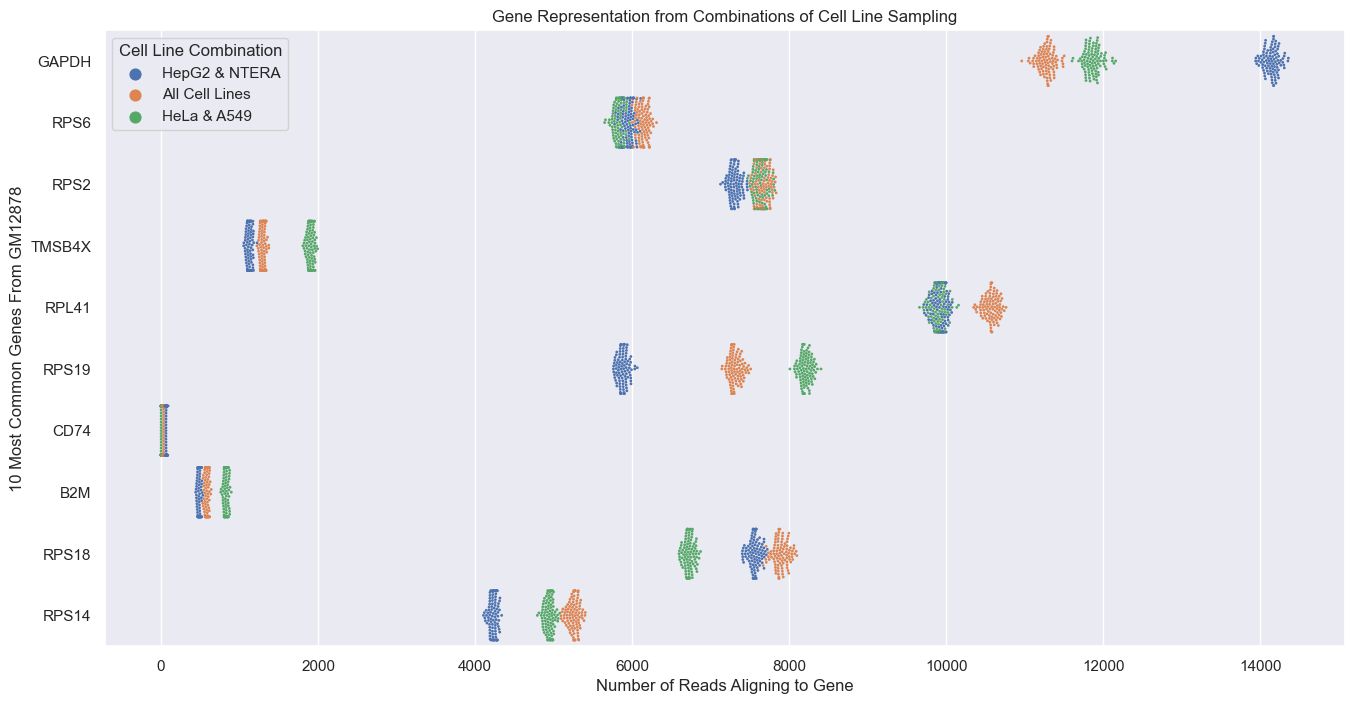

In [13]:
sns.set(rc={"figure.figsize":(16, 8)}) #width=3, #height=4
g = sns.swarmplot(data=df, x = 'Count', y='Gene', hue='Cell Line Combination', size =2)
g.set(xlabel = 'Number of Reads Aligning to Gene', ylabel = '10 Most Common Genes From GM12878', title = 'Gene Representation from Combinations of Cell Line Sampling')

In [14]:
g.get_figure().savefig('Top 10 GM12878 Gene Representation.png')
g.get_figure().savefig('Top 10 GM12878 Gene Representation.eps')
g.get_figure().savefig('Top 10 GM12878 Gene Representation.pdf')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
